<div id="container" style="position:relative;">
<div style="float:left"><h1> Introduction to Spark </h1></div>
<div style="position:relative; float:right">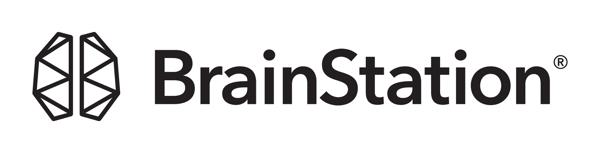
</div>
</div>

### What is Spark?

Apache Spark is an in-memory distributed computing system with high-level APIs in Java, Scala, Python and R, and a graph-based optimization engine. It also supports a rich set of higher-level tools including 
- _Spark SQL_ for SQL and structured data processing,
- _MLlib_ for supervised and unsupervised machine learning,
- _GraphX_ for graph processing, and 
- _Spark Streaming_ for working with live data streams.

Unlike Hadoop, Spark does not write to disk but keeps data in memory and so is typically much faster for performing data engineering, analysis, and modeling tasks within Big Data environments and with large data sets.

### Spark Basics and Environment Setup

First we will initialize the [SparkContext and SparkSession](https://spark.apache.org/docs/2.2.0/rdd-programming-guide.html#initializing-spark) - make sure you have the `PySpark` environment selected, otherwise the Spark session need to be initialized manually.

Once the session is initialized, we can view running jobs and other related information in the [Spark Web UI](https://spark.apache.org/docs/latest/monitoring.html#web-interfaces). 

By default, the UI is accessed through port 4040, and can be accessed by either navigating the Web UI URL on that port (default: http://localhost:4040) or by accessing through the SparkSession object details. (Note: On EMR, viewing the Spark UI and Driver log links below requires SSH tunneling with port-forwarding).

In [1]:
spark

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
1,application_1685387058025_0002,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We can then check the available python packages and potentially add new ones - we will make sure that `pandas` and `matplotlib` are both available for us. 

In [2]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- ----------
aws-cfn-bootstrap          2.0
beautifulsoup4             4.9.3
boto                       2.49.0
click                      8.1.3
docutils                   0.14
jmespath                   1.0.1
joblib                     1.2.0
lockfile                   0.11.0
lxml                       4.9.2
mysqlclient                1.4.2
nltk                       3.8
nose                       1.3.4
numpy                      1.20.0
pip                        20.2.2
py-dateutil                2.2
pystache                   0.5.4
python-daemon              2.2.3
python37-sagemaker-pyspark 1.4.2
pytz                       2022.7
PyYAML                     5.4.1
regex                      2021.11.10
setuptools                 28.8.0
simplejson                 3.2.0
six                        1.13.0
tqdm                       4.64.1
wheel                      0.29.0
windmill                   1.6


**Troubleshooting**: if you get an error, that could be due to the Spark configuration set differently. Try running the following piece of code in a new cell at the very beginning of the notebook first:

```python
%%configure -f
{
    "conf": {
        "spark.pyspark.python": "python3",
        "spark.pyspark.virtualenv.enabled": "true",
        "spark.pyspark.virtualenv.type":"native",
        "spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv"
    }
}
```

You can double-check these settings by running the following cell:

In [3]:
%%info

ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
1,application_1685387058025_0002,pyspark,idle,Link,Link,None,✔


In [4]:
# install data science & plotting packages

sc.install_pypi_package("pandas==1.0.5") 
sc.install_pypi_package("matplotlib==3.1.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We can now check that the packages can be imported:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

You can find more information on working with Python libraries on EMR Notebooks in [this post](https://aws.amazon.com/blogs/big-data/install-python-libraries-on-a-running-cluster-with-emr-notebooks/) by AWS.

When we are finished with all our work, a Spark session can be halted with `stop()`.

In [6]:
# Do not run! (we're going to keep working)
# spark.stop()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Working with Spark RDDs

The main abstraction Spark uses are objects called *resilient distributed datasets* (in short, RDDs), which partitions and distributes data across the nodes of the cluster such that it can be operated on in parallel.

There are two ways to create an RDD: either by parallelizing existing data in memory, or by reading in / referencing a data set.

For the former, if we have regular data in python, _e.g._ in a list, we can distribute it across the memory of the nodes by using `sc.parallelize()`. This will return an object of class RDD:

In [7]:
import numpy as np

data = np.random.rand(10**6, 5)

distdata = sc.parallelize(data)

print(distdata.__class__)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pyspark.rdd.RDD'>

We can also read data into an RDD directly from a datasource. Here we will work with the [Open Air Quality dataset](https://registry.opendata.aws/openaq/) from OpenAQ, which is publicly readable from an S3 bucket:

In [8]:
data = sc.textFile('s3://brainstation-dsft/sparklab/openaq-2017-09-05.csv')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
data

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

s3://brainstation-dsft/sparklab/openaq-2017-09-05.csv MapPartitionsRDD[6] at textFile at NativeMethodAccessorImpl.java:0

#### Inspecting Data

To examine the first few rows of an RDD, we can call the `take` function:

In [10]:
data.take(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['"Wynyard","1","µg/m³","pm25","AU","Tasmania Region","Australia - Tasmania","2017-09-04T23:54:19.000Z","2017-09-05T09:54:19+10:00","government","false","-40.9918","145.719","0.25","hours"', '"Wynyard","2","µg/m³","pm10","AU","Tasmania Region","Australia - Tasmania","2017-09-04T23:54:19.000Z","2017-09-05T09:54:19+10:00","government","false","-40.9918","145.719","0.25","hours"', '"Emu River","0","µg/m³","pm25","AU","Tasmania Region","Australia - Tasmania","2017-09-04T23:54:17.000Z","2017-09-05T09:54:17+10:00","government","false","-41.1081","145.883","0.25","hours"', '"Emu River","1","µg/m³","pm10","AU","Tasmania Region","Australia - Tasmania","2017-09-04T23:54:17.000Z","2017-09-05T09:54:17+10:00","government","false","-41.1081","145.883","0.25","hours"', '"West Ulverstone","0","µg/m³","pm25","AU","Tasmania Region","Australia - Tasmania","2017-09-04T23:54:22.000Z","2017-09-05T09:54:22+10:00","government","false","-41.1586","146.146","0.25","hours"']

You can see the data is returned as a list of arrays. We can also count the number of rows in the RDD to see how much data we're working with:

In [11]:
data.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

553383

We can get information about how the data is partitioned:

In [12]:
data.getNumPartitions()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2

By modifying the number of partitions, we can optimize how the data is parallelized:

In [13]:
data = data.repartition(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
data.getNumPartitions()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

10

As a general rule of thumb, aim for 3-4 times the number of CPU cores in your cluster. When setting these numbers, we keep in mind the following trade-off:
- a small number of partitions will mean that we are not utilizing all available compute;
- too many partitions will break the compute jobs into very small tasks creating unnecessary workload on management and communication between the nodes.

#### Manipulating RDDs

Spark RDD functions relies heavily on functional programming concepts and the use of lambda functions to apply operations across all elements in an RDD. The `map` function will apply the lambda function to each row of an RDD and return a new RDD of the transformed data as a result. Since each row of the data is stored as a string, we can use the `split()` method to extract a column as an RDD.

In [15]:
# slice out the 6th column
data.map(lambda x: x.split(",")[6]).take(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['"Bosnia"', '"Bosnia"', '"Sao Paulo"', '"Sao Paulo"', '"Sao Paulo"', '"Sao Paulo"', '"Sao Paulo"', '"Sao Paulo"', '"Sao Paulo"', '"Sao Paulo"']

In the same spirit, we can filter our data based on a condition (such as the location is Turkey) and count the number of results:

In [16]:
# Filter only rows where the country name is equal to Turkey
data.filter(lambda x: x.split(",")[6] == '"Turkey"').count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

9980

We can then apply the usual analytical functions and data operations that we did earlier with SQL and Pandas. For example, the `groupBy()` can be applied to group and then aggregate the RDD. Since the resulting data is small, we can save it in a Pandas dataframe.

In [17]:
# GroupBy
grouped = data.groupBy(lambda x: x.split(",")[6])
results = []

for (k, v) in grouped.collect():
    results.append((k, len(v)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We see that there were 109 unique locations in the data:

In [18]:
len(results)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

109

In [19]:
results

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('"Agaar.mn"', 547), ('"Gjøvik"', 72), ('"Shanghai"', 23), ('"Kanchanaburi"', 95), ('"Thailand"', 40), ('"Kolkata"', 183), ('"Lampang"', 383), ('"Australia - New South Wales"', 2595), ('"Australia - Queensland"', 1760), ('"Thane"', 135), ('"Amritsar"', 396), ('"Guangzhou"', 23), ('"Nagpur"', 67), ('"Phrae"', 91), ('"Chiang Mai"', 181), ('"Mae Hong Son"', 21), ('"StateAir_KuwaitCity"', 19), ('"MUSCATINE"', 38), ('"Omaha-Council Bluffs"', 16), ('"Bangkok"', 663), ('"Bosnia_Tuzlanski"', 569), ('"Norway"', 2682), ('"Davenport-Moline-Rock Island"', 96), ('"Satun"', 110), ('"Yala"', 85), ('"StateAir_Bogota"', 22), ('"StateAir_Hanoi"', 23), ('"Oslo"', 72), ('"Samut Sakhon"', 131), ('"Aurangabad"', 209), ('"Durgapur"', 104), ('"Samut Prakan"', 113), ('"Richards Bay"', 1146), ('"Iowa City"', 20), ('"Sao Paulo"', 4356), ('"CPCB"', 9840), ('"StateAir_Lima"', 24), ('"Hyderabad"', 1123), ('"Chillán"', 44), ('"PALO ALTO"', 29), ('"StateAir_Dhaka"', 22), ('"Nan"', 215), ('"EEA Denmark"', 574), ('"RI

We can take this list to create a pandas dataframe and then visualize the results. To ensure that your matplotlib visuals show up in the EMR notebook, the plotting cell must end with the `%matplot plt` line as you see below. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

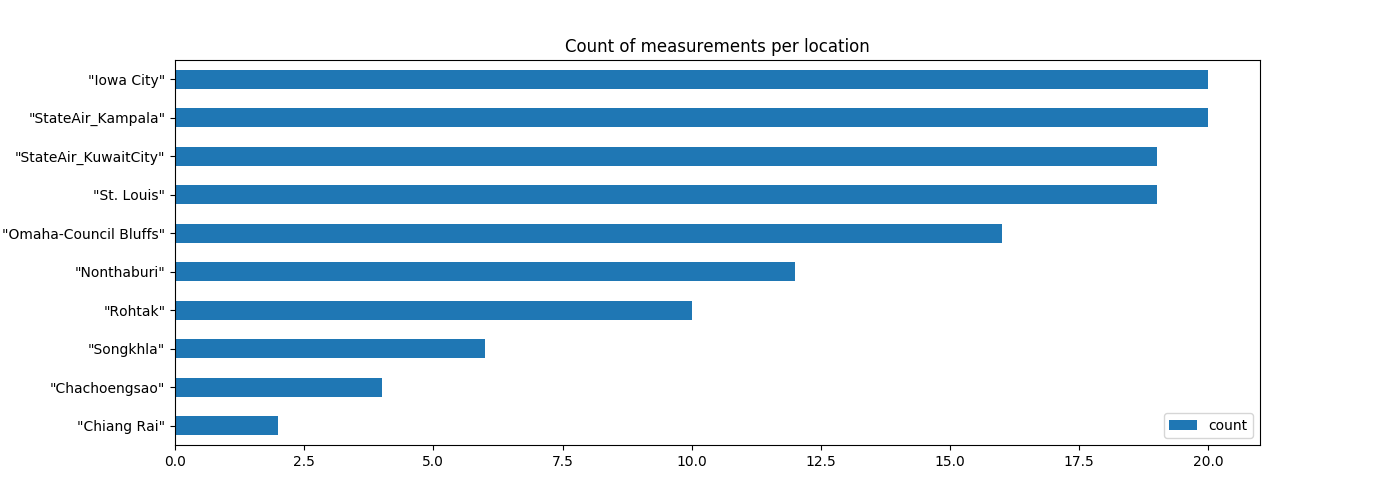

In [20]:
plt.figure()

pd.DataFrame(results, columns = ["city", "count"])\
    .set_index("city")\
    .sort_values("count")\
    .head(10)\
    .plot(kind="barh", figsize=(14, 5), title="Count of measurements per location")

plt.show()

# make sure to keep this line
%matplot plt

### Working with Spark DataFrames

In practice, working with RDDs is cumbersome and as a data scientist (or even data engineer) it is usually easier to use [Spark SQL and DataFrames](https://spark.apache.org/docs/latest/sql-programming-guide.html) which are higher level APIs built on top of RDDs. The DataFrames API closely mirrors functionality and syntax from pandas, making it easy for a data scientist or developer to transition from working with smaller datasets in a centralized environment (_i.e._ your laptop) to working with large datasets in a distributed Big Data environment.

Spark can read data locally from files, databases, large datasets from HDFS, or even from S3 buckets! There is a full list of compatible data sources [here](https://spark.apache.org/docs/latest/sql-data-sources.html).

In [21]:
# read from S3 directly
df = spark.read.csv('s3://brainstation-dsft/sparklab/yellow_tripdata_2018-10.csv', header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

There is also an `inferSchema` parameter that if set to True tells Spark to infer the data types in each column, which requires another pass through the data which can be expensive when working with large datasets. If set to `None` or `False` (default) then all columns are read in as strings.

We can print out the schema and data types in human-readable format using `printSchema()`:

In [22]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- VendorID: string (nullable = true)
 |-- tpep_pickup_datetime: string (nullable = true)
 |-- tpep_dropoff_datetime: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- trip_distance: string (nullable = true)
 |-- RatecodeID: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: string (nullable = true)
 |-- DOLocationID: string (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- fare_amount: string (nullable = true)
 |-- extra: string (nullable = true)
 |-- mta_tax: string (nullable = true)
 |-- tip_amount: string (nullable = true)
 |-- tolls_amount: string (nullable = true)
 |-- improvement_surcharge: string (nullable = true)
 |-- total_amount: string (nullable = true)
 |-- congestion_surcharge: string (nullable = true)
 |-- airport_fee: string (nullable = true)

You can also get a list of the columns using `.columns`:

In [23]:
df.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

Let's take a look at our data. There is a `head` command for Spark DataFrames just like for those in pandas.

In [24]:
# Just like for RDDs, we can show the first few lines using take (or equivalently, df.head(n_rows))
df.head(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(VendorID='1', tpep_pickup_datetime='2018-10-01 00:23:34', tpep_dropoff_datetime='2018-10-01 00:44:50', passenger_count='1.0', trip_distance='6.2', RatecodeID='1.0', store_and_fwd_flag='N', PULocationID='68', DOLocationID='7', payment_type='2', fare_amount='20.5', extra='0.5', mta_tax='0.5', tip_amount='0.0', tolls_amount='0.0', improvement_surcharge='0.3', total_amount='21.8', congestion_surcharge=None, airport_fee=None), Row(VendorID='1', tpep_pickup_datetime='2018-10-01 00:40:05', tpep_dropoff_datetime='2018-10-01 01:01:56', passenger_count='1.0', trip_distance='12.6', RatecodeID='1.0', store_and_fwd_flag='N', PULocationID='132', DOLocationID='9', payment_type='2', fare_amount='35.0', extra='0.5', mta_tax='0.5', tip_amount='0.0', tolls_amount='0.0', improvement_surcharge='0.3', total_amount='36.3', congestion_surcharge=None, airport_fee=None), Row(VendorID='1', tpep_pickup_datetime='2018-10-01 00:05:35', tpep_dropoff_datetime='2018-10-01 00:19:38', passenger_count='1.0', trip_di

If we use `take` or `head`, we get back lists of Row objects that are not very easy to read. Instead we can call `show` to get nicely formatted tabular data:

In [25]:
df.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       1| 2018-10-01 00:23:34|  2018-10-01 00:44:50|            1.0|          6.2|       1.0|                 N|          68|           7|           2|       20.5|  0.5|    0.5|       0.

The number of columns makes it hard to read this presentation, so we can transpose the dataframe with the `vertical=True` option:

In [26]:
df.show(10, vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0------------------------------------
 VendorID              | 1                   
 tpep_pickup_datetime  | 2018-10-01 00:23:34 
 tpep_dropoff_datetime | 2018-10-01 00:44:50 
 passenger_count       | 1.0                 
 trip_distance         | 6.2                 
 RatecodeID            | 1.0                 
 store_and_fwd_flag    | N                   
 PULocationID          | 68                  
 DOLocationID          | 7                   
 payment_type          | 2                   
 fare_amount           | 20.5                
 extra                 | 0.5                 
 mta_tax               | 0.5                 
 tip_amount            | 0.0                 
 tolls_amount          | 0.0                 
 improvement_surcharge | 0.3                 
 total_amount          | 21.8                
 congestion_surcharge  | null                
 airport_fee           | null                
-RECORD 1------------------------------------
 VendorID              | 1        

We can slice out just a few columns with the `.select()` method:

In [27]:
df.select('tpep_pickup_datetime', 'trip_distance', 'fare_amount').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+-----------+
|tpep_pickup_datetime|trip_distance|fare_amount|
+--------------------+-------------+-----------+
| 2018-10-01 00:23:34|          6.2|       20.5|
| 2018-10-01 00:40:05|         12.6|       35.0|
| 2018-10-01 00:05:35|          6.1|       19.0|
| 2018-10-01 00:42:56|          1.3|        7.0|
| 2018-10-01 00:19:14|          2.6|       11.0|
| 2018-10-01 00:36:27|         19.7|       54.0|
| 2018-10-01 00:26:25|          2.3|        9.0|
| 2018-10-01 00:11:13|        19.14|       52.0|
| 2018-10-01 00:42:46|         4.31|       15.5|
| 2018-10-01 00:33:49|         0.64|        4.5|
+--------------------+-------------+-----------+
only showing top 10 rows

We can sort the outputs as well:

In [28]:
df.select('tpep_pickup_datetime', 'trip_distance', 'fare_amount').sort('fare_amount', ascending=False).show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+-----------+
|tpep_pickup_datetime|trip_distance|fare_amount|
+--------------------+-------------+-----------+
| 2018-10-18 14:16:24|        258.0|    9984.22|
| 2018-10-06 15:52:05|        14.57|      99.99|
| 2018-10-03 04:21:49|          0.0|      99.97|
| 2018-10-22 09:07:00|        33.86|      99.93|
| 2018-10-29 16:21:56|         5.54|       99.8|
| 2018-10-26 20:11:23|          0.0|       99.8|
| 2018-10-26 20:59:51|          0.0|       99.8|
| 2018-10-24 08:18:32|          0.0|       99.8|
| 2018-10-12 02:40:40|         21.7|      99.75|
| 2018-10-17 04:30:25|         28.1|      99.75|
+--------------------+-------------+-----------+
only showing top 10 rows

The total count of rows for the whole dataframe is returned using the `.count()`, just like for an RDD:

In [29]:
df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

8834520

For large datasets, even counting the number of rows can be an expensive operation! We can see that there are almost 9 million rides in the dataset! How many pick-up location do we have in the data set?

In [30]:
df.select('PULocationID').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

262

Dataframes in Spark are _immutable_, which means that data in individual columns cannot be updated / modified as it would be in other cases (like pandas or R). However, new columns can be created from old columns (and also overwrite/replace entire existing columns) with the `withColumn` method (see the [documentation](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.withColumn.html) for more info), and unneeded columns dropped using `drop`.

While the `drop` function just takes a comma-separated list of column names, the `withColumn` function, like many functions in Spark, takes a DataFrame column as an argument. We will correct the datatype of the `trip_distance`, `passenger_count` and `tpep_pickup_datetime` columns first: 

In [31]:
df = df.withColumn("trip_distance", df["trip_distance"].cast('float'))

df = df.withColumn("passenger_count", df["passenger_count"].cast('int'))

df = df.withColumn("tpep_pickup_datetime", df["tpep_pickup_datetime"].cast('timestamp'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
# Check
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- VendorID: string (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: string (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: float (nullable = true)
 |-- RatecodeID: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: string (nullable = true)
 |-- DOLocationID: string (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- fare_amount: string (nullable = true)
 |-- extra: string (nullable = true)
 |-- mta_tax: string (nullable = true)
 |-- tip_amount: string (nullable = true)
 |-- tolls_amount: string (nullable = true)
 |-- improvement_surcharge: string (nullable = true)
 |-- total_amount: string (nullable = true)
 |-- congestion_surcharge: string (nullable = true)
 |-- airport_fee: string (nullable = true)

We can see that the data representation actually changed:

In [33]:
df.take(1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(VendorID='1', tpep_pickup_datetime=datetime.datetime(2018, 10, 1, 0, 23, 34), tpep_dropoff_datetime='2018-10-01 00:44:50', passenger_count=1, trip_distance=6.199999809265137, RatecodeID='1.0', store_and_fwd_flag='N', PULocationID='68', DOLocationID='7', payment_type='2', fare_amount='20.5', extra='0.5', mta_tax='0.5', tip_amount='0.0', tolls_amount='0.0', improvement_surcharge='0.3', total_amount='21.8', congestion_surcharge=None, airport_fee=None)]

Now, we can dig deeper into the data and use the `.agg()` method to aggregate specific columns. For example, let's calculate the mean trip_distance again:

In [34]:
df.agg({"trip_distance": "mean"}).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+
|avg(trip_distance)|
+------------------+
| 2.996145569781007|
+------------------+

#### Exercise 1

Let's clean and understand our data further.

1. Using `withColumn` and `cast`, convert the **fare_amount** and **tip_amount** columns to `float` data type.
2. Calculate a new column, `tip_pct`, which is the ratio of the tip amount and the base fare, and show the top 10 records of this new column.
3. Calculate the average tip percentage across all rides.

### Transformations and Actions

In Spark, there are two main types of operations:
- _transformations_ are used to create new data sets from existing data, and
- _actions_ return a value after doing a computation.

The very important distinction between the two is while transformations add computations to the plan without executing it immediately, it is only when an action is called that all the computations will be done. This is known as _lazy evaluation_: no computation is done until absolutely necessary.

<center>
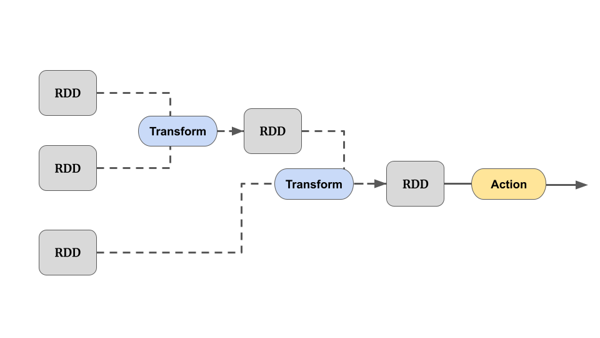
<caption>Transformations create a plan, actions execute
</caption>
<br>
<br>
</center>

Operations like `map()`, `distinct()`, `groupby()`, or `avg()` are transformations, a computational strategy for creating a new dataframe from the current ones (note that dataframes are immutable in Spark so we always create new ones). 

Unlike transformations, actions execute the computation and actually "do work" on the cluster. Adding many different transformations creates a chain which will be executed in sequence, and Spark translates into the appropriate steps in computation and data movement (the "plan").

One of the most common actions is `collect()`. It does the computations on the cluster and then draws the result into memory on the head node. Care should be taken when calling this, as if the size of the data is larger then what is available on the head node than it will fail or overload the head node. Further actions are `count()`, `take()` or `show()`.

### Spark Built-in Functions

In order to extract the information from trip duration, we can use string or date-time methods. A large number of useful utility functions can be loaded from the `pyspark.sql.functions` submodule - these functions are always more effective than writing our own transformations or applying `.map()`.

In [35]:
from pyspark.sql.functions import to_date, hour

df = df.withColumn('pickup_date', to_date(df['tpep_pickup_datetime'])) 
df = df.withColumn('pickup_hour', hour(df['tpep_pickup_datetime'])) 

df.select('tpep_pickup_datetime', 'pickup_date', 'pickup_hour').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------+-----------+
|tpep_pickup_datetime|pickup_date|pickup_hour|
+--------------------+-----------+-----------+
| 2018-10-01 00:23:34| 2018-10-01|          0|
| 2018-10-01 00:40:05| 2018-10-01|          0|
| 2018-10-01 00:05:35| 2018-10-01|          0|
| 2018-10-01 00:42:56| 2018-10-01|          0|
| 2018-10-01 00:19:14| 2018-10-01|          0|
+--------------------+-----------+-----------+
only showing top 5 rows

This allows us to understand how time of day affects taxi usage:

In [36]:
avg_dist_df = df.groupby('pickup_hour').avg('trip_distance')

avg_dist_df.sort('pickup_hour').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------------------+
|pickup_hour|avg(trip_distance)|
+-----------+------------------+
|          0|   3.3790431446791|
|          1| 3.155846546286721|
|          2| 3.032917337766958|
|          3|  3.23658327474544|
|          4|4.0948981877690676|
|          5|  4.54383114836558|
|          6|3.4773395799917584|
|          7|2.9194732312593112|
|          8|  2.67456556472397|
|          9|2.6655875992575395|
|         10| 2.712151235288979|
|         11|2.7127172039358642|
|         12|2.8276014200598776|
|         13| 2.975941792291651|
|         14|3.1045253696352297|
|         15| 2.970253423787858|
|         16|3.1301303135197003|
|         17|2.8959199292452666|
|         18| 2.742157417756311|
|         19| 2.747300828057295|
+-----------+------------------+
only showing top 20 rows

The Spark functions can be effectively used in combination with the `.filter()` method as well without creating a new column to look at subsets of the data:

In [37]:
df.filter(hour(df["tpep_pickup_datetime"]) == 10).show(1, vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0------------------------------------
 VendorID              | 2                   
 tpep_pickup_datetime  | 2018-10-01 10:00:54 
 tpep_dropoff_datetime | 2018-10-01 10:11:40 
 passenger_count       | 1                   
 trip_distance         | 1.13                
 RatecodeID            | 1.0                 
 store_and_fwd_flag    | N                   
 PULocationID          | 237                 
 DOLocationID          | 43                  
 payment_type          | 2                   
 fare_amount           | 8.5                 
 extra                 | 0.0                 
 mta_tax               | 0.5                 
 tip_amount            | 0.0                 
 tolls_amount          | 0.0                 
 improvement_surcharge | 0.3                 
 total_amount          | 9.3                 
 congestion_surcharge  | null                
 airport_fee           | null                
 pickup_date           | 2018-10-01          
 pickup_hour           | 10       

### Exporting from Spark to a local Pandas dataframe

In a working Big Data environment, large datasets would be initially read into Spark and worked with using the distributed (cluster) environment and then can be converted to pandas once they've been reduced down by filtering, aggregation, and other processing. 

If the pandas library is installed on the head node, there is a `.toPandas()` method which will convert a Spark DataFrame into a pandas DataFrame. However, care should be taken when using the `.toPandas()` (or `.collect()` ), as it must be guaranteed that the data in the Spark DataFrame will fit into memory.

An alternative approach would be to write reduced data out to either HDFS or another filesystem (S3, Google Cloud Storage, Azure Blob Storage, etc.) or even a database as part of a Big Data analysis workflow.

In [38]:
avg_dist_pd = avg_dist_df.toPandas()

avg_dist_pd.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   pickup_hour  avg(trip_distance)
0           12            2.827601
1            1            3.155847
2            6            3.477340
3            3            3.236583
4            4            4.094898

Working with pandas dataframes allows us to visualize our data as usual:

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

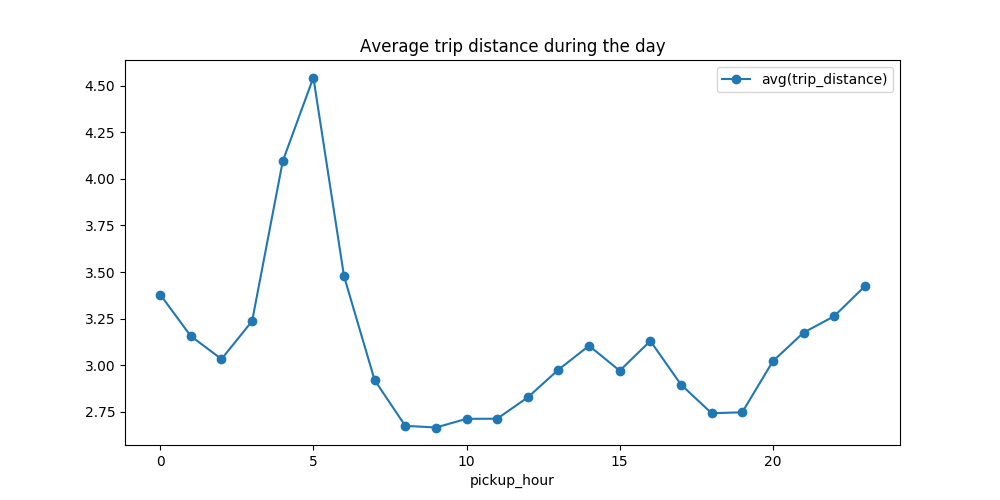

In [39]:
plt.figure()

avg_dist_pd.sort_values("pickup_hour")\
    .set_index("pickup_hour")\
    .plot(marker='o', figsize=(10, 5), title="Average trip distance during the day")

plt.show()

%matplot plt

Interestingly, the average trip distance peaks at 5am with 4.5 miles while staying lower during the day around 3 miles, gradually picking up during the day. Do you have any guesses about the early morning peak?

#### Exercise 2

Let's analyze the usage further, now on a daily level.

1. How many daily trips do we have recorded? Do you notice anything out of ordinary?
2. Filter the trips to October 2018 only. You can make use of the Spark SQL built-in functions such as `year()` and `month()` to extract the relevant date information.
3. Find the total fare charged for each day and visualize the results. Don't forget to use `.toPandas()` before plotting.

In [40]:
from pyspark.sql.functions import year, month

# your code comes here



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Spark SQL

Spark SQL refers both to the aggregation functions available to work with data within DataFrames as one would with RDDs, as well as the ability to conveniently query and aggregate data using ordinary SQL queries via use of the `spark.sql` module. Spark SQL can also be used to query any data that is available in Hive tables directly.

It should be emphasized that Spark is not a database (!) however the internals can take SQL queries and convert them into transformations which are then optimized and executed by the Spark engine. The Spark functions that we used above have equivalent representations as SQL queries that can be executed using `spark.sql()`.

Using SQL requires the `CreateorReplaceTempView` function, which registers the data as a view in the Spark session (note that the view will only be available until the current Spark session ends). We can then query against that view with SQL, with the view name being the table name:

In [41]:
# register the dataframe as a view
df.createOrReplaceTempView("taxi_nyc")

# execute a SQL query
spark.sql("SELECT PULocationID, trip_distance FROM taxi_nyc").show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+-------------+
|PULocationID|trip_distance|
+------------+-------------+
|          68|          6.2|
|         132|         12.6|
|          50|          6.1|
|         151|          1.3|
|         233|          2.6|
|         132|         19.7|
|         260|          2.3|
|         132|        19.14|
|         249|         4.31|
|         236|         0.64|
+------------+-------------+
only showing top 10 rows

Let's do a simple `GROUP BY` to count the number of trips present in the data set for each pick-up location:

In [42]:
spark.sql(
    "SELECT PULocationID, COUNT(*) AS count FROM taxi_nyc GROUP BY PULocationID ORDER BY count DESC"
).show(10)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+------+
|PULocationID| count|
+------------+------+
|         237|393742|
|         236|358902|
|         161|335699|
|         162|308639|
|         186|293345|
|         230|289526|
|         170|275574|
|         142|274640|
|          48|273851|
|         234|269748|
+------------+------+
only showing top 10 rows

To create a better readable query, we can use the backslash character `\` to break the long string into multiple lines (be careful not to include any other characters after the backslash, not even a whitespace).

In [43]:
spark.sql(
    "SELECT\
        PULocationID,\
        COUNT(*) AS count\
    FROM taxi_nyc\
    GROUP BY PULocationID\
    ORDER BY count DESC"
).show(10)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+------+
|PULocationID| count|
+------------+------+
|         237|393742|
|         236|358902|
|         161|335699|
|         162|308639|
|         186|293345|
|         230|289526|
|         170|275574|
|         142|274640|
|          48|273851|
|         234|269748|
+------------+------+
only showing top 10 rows

One alternative to writing SQL queries is to use Spark SQL functions/methods directly on the DataFrame. The previous query can be written like this:

In [44]:
# Perform a transformation using Spark SQL functions

df.select('PULocationID')\
    .groupby('PULocationID')\
    .count()\
    .sort('count', ascending=False)\
    .show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+------+
|PULocationID| count|
+------------+------+
|         237|393742|
|         236|358902|
|         161|335699|
|         162|308639|
|         186|293345|
|         230|289526|
|         170|275574|
|         142|274640|
|          48|273851|
|         234|269748|
+------------+------+
only showing top 10 rows

For another example, let's see how we can then calculate the average trip distance for each origin in two ways. First, using Spark SQL methods and using the `withColumnRenamed()` method to rename columns (useful for aggregated columns):

In [45]:
df.groupby('PULocationID')\
    .avg('trip_distance')\
    .withColumnRenamed('avg(trip_distance)', 'avg_distance')\
    .show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+------------------+
|PULocationID|      avg_distance|
+------------+------------------+
|           7| 2.555883452418879|
|         154|14.647187640191987|
|         258| 9.035214507208504|
|         203|  12.9824014275959|
|         199|1.1850000321865082|
|          31| 6.845789462327957|
|          18| 7.296695294298328|
|          61| 4.891168442772413|
|          27| 11.50857140336718|
|          75| 2.380305627726145|
+------------+------------------+
only showing top 10 rows

Second, we can write this as a SQL query:

In [46]:
spark.sql(
    "SELECT\
        PULocationID,\
        AVG(trip_distance) AS avg_distance\
    FROM taxi_nyc\
    GROUP BY PULocationID"
).show(10)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+------------------+
|PULocationID|      avg_distance|
+------------+------------------+
|           7| 2.555883452418879|
|         154|14.647187640191987|
|         258| 9.035214507208504|
|         203|  12.9824014275959|
|         199|1.1850000321865082|
|          31| 6.845789462327957|
|          18| 7.296695294298328|
|          61| 4.891168442772413|
|          27| 11.50857140336718|
|          75| 2.380305627726145|
+------------+------------------+
only showing top 10 rows

In both cases, the result is returned as a Spark DataFrame which can be saved to a new variable.

#### Exercise 3

We are tasked with understanding the data better with respect to pickup location.

1. First, let's load some additional information about the pickup and dropoff locations from `s3://brainstation-dsft/sparklab/taxi_lat_lon.csv` into a Spark DataFrame and create a temporary view called `nyc_locations`. 

2. Use Spark SQL to find the trip counts and average tip amounts per borough. You will need to join the tables holding the trips and the new location information. What patterns do you notice in the result?

___

### Spark MLlib for modelling

The MLlib library in Spark allows us to access similar functionalities that are available in the statsmodels and scikit-learn packages:
- basic statistics (such as correlations) and hypothesis tests;
- common preprocessing and feature extraction methods: various scalers, OneHotEncoder, PCA, and NLP methods, among others;
- a number of statistical and machine learning models: 
    - supervised algorithm for regression and classification (like linear models or decision trees), and
    - unsupervised methods (like K-means clustering). 

The [official guide](https://spark.apache.org/docs/latest/mllib-guide.html) provides a number of examples on how to set up the data using pipelines, train the models and then evaluate them. 

Let's create a simple linear regression model that predicts the tip amount based on other features associated with the trip. First, to make this demonstration run faster, we will subsample our dataset.

In [47]:
df_for_modelling = df.sample(0.01, seed=42)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [48]:
df_for_modelling = df_for_modelling.select("trip_distance", "fare_amount", "pickup_hour", "passenger_count", "tip_amount")

# make sure fare amount is float - see Exercise 1
df_for_modelling = df_for_modelling.withColumn("fare_amount", df_for_modelling["fare_amount"].cast('float'))
df_for_modelling = df_for_modelling.withColumn("tip_amount", df_for_modelling["tip_amount"].cast('float'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We will simply drop rows with missing data:

In [49]:
df_for_modelling = df_for_modelling.dropna()

df_for_modelling.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

88580

To prepare the data for modelling, we need to collect our independent variables into `Vector` objects that are then stored in a single column - this is a specific preprocessing step required by the Spark MLlib API. We will do this using the `VectorAssembler` transformation by specifying which columns should be included as well as how to handle invalid values (like Nulls). You can read more in the [VectorAssembler documentation](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.VectorAssembler.html).

In [50]:
from pyspark.ml.feature import VectorAssembler

# initialize the assembler object for combining the independent variables
# more columns can be added in case of multiple predictors
assembler = VectorAssembler(inputCols=["trip_distance", "fare_amount", "pickup_hour", "passenger_count"], outputCol='features', handleInvalid="skip")

# the transform call will add the extra `features` column
# we only need `features` and the duration for modelling so we select these two
df_for_modelling = assembler.transform(df_for_modelling).select("features", "tip_amount")

df_for_modelling.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------+
|            features|tip_amount|
+--------------------+----------+
|[10.1000003814697...|       0.0|
|[11.3800001144409...|       5.0|
|[4.36000013351440...|      2.96|
|[2.90000009536743...|       0.0|
|[2.17000007629394...|       0.0|
|[3.73000001907348...|       0.0|
|[2.47000002861022...|       0.0|
|[0.70999997854232...|      1.26|
|[3.29999995231628...|      2.65|
|[7.73999977111816...|      5.96|
+--------------------+----------+
only showing top 10 rows

For model evaluation, we also split our data into training and test sets:

In [51]:
train, test = df_for_modelling.randomSplit([0.9, 0.1], seed=42)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We are ready to load the `LinearRegression` model which then needs to be initialized by the column holding our independent variables (`features` in our case) and the label column (`tip_amount`). As with scikit-learn, we will call the `.fit()` method providing the training data.

In [52]:
from pyspark.ml.regression import LinearRegression

lr_model = LinearRegression(featuresCol='features', labelCol='tip_amount', maxIter=5)

lr_model = lr_model.fit(train)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We can now access the coefficients and intercept value, as well as the model summary:

In [53]:
print("Intercept:", lr_model.intercept)
print("Coefficients:", lr_model.coefficients)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Intercept: 0.1871673924699302
Coefficients: [0.09529203821729595,0.10006104146917146,0.010762995999758773,-0.012286091408337628]

As usual, we can visualize the coefficients:

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

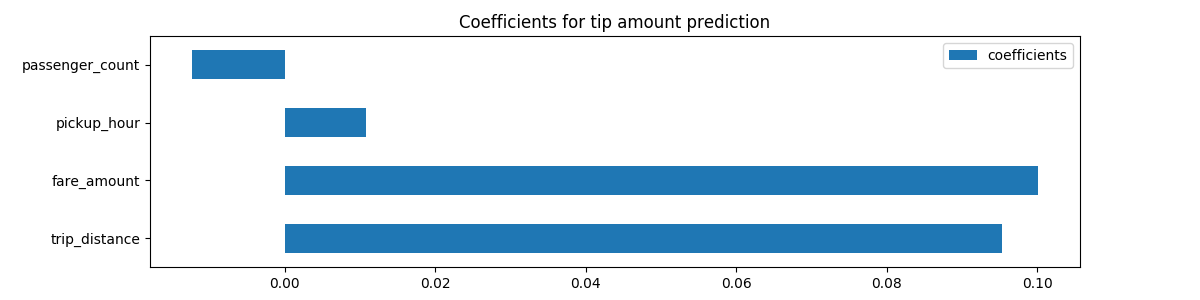

In [54]:
plt.figure()

pd.DataFrame(
    data={"coefficients": lr_model.coefficients},
    index=["trip_distance", "fare_amount", "pickup_hour", "passenger_count"],
).plot(kind="barh", figsize=(12, 3), title="Coefficients for tip amount prediction")

plt.show()

%matplot plt

It is quite natural that increased fare amount and trip distance have a positive effect on tip amount, however a larger number of passengers drives down the amount of tip.

To further evaluate the model performance, we can extract the p-values and various metrics from a model summary object:

In [55]:
model_summary = lr_model.summary

print("R^2: ", model_summary.r2)
print("MAE: ", model_summary.meanAbsoluteError)
print("MSE: ", model_summary.meanSquaredError)
print("p-values: ", model_summary.pValues)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

R^2:  0.34362854419953837
MAE:  1.3657276072616826
MSE:  4.438903099785121
p-values:  [0.0, 0.0, 0.0, 0.04320844058194839, 0.0]

In order to make predictions, we can call the `.transform()` method of the model which adds a `prediction` column.

In [56]:
test_pred = lr_model.transform(test)

test_pred.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------+--------------------+
|            features|tip_amount|          prediction|
+--------------------+----------+--------------------+
|   [0.0,2.5,2.0,5.0]|       0.0|  0.3974155311006882|
|   [0.0,2.5,6.0,5.0]|       0.0|  0.4404675150997233|
|  [0.0,2.5,20.0,1.0]|       0.0|  0.6402938247296966|
|   [0.0,3.0,4.0,3.0]|       0.0|  0.4935442266514668|
| [0.0,12.0,12.0,1.0]|      2.56|  1.5047697506887554|
| [0.0,52.0,17.0,5.0]|     11.46|   5.511882023821057|
|[0.0,100.0,10.0,1.0]|       0.0|  10.288615407976327|
|[0.0,129.80000305...|       0.0|  13.324249729118495|
|[0.03999999910593...|       0.0|   0.633342510173432|
|[0.15000000596046...|       0.0|-0.11164495735268626|
+--------------------+----------+--------------------+
only showing top 10 rows

To evaluate the prediction on the test set, we utilize the `RegressionEvaluator` class:

In [57]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="tip_amount", predictionCol="prediction")

print("Test R^2: ", evaluator.evaluate(test_pred, {evaluator.metricName: "r2"}))

print("Test MAE: ", evaluator.evaluate(test_pred, {evaluator.metricName: "mae"}))

print("Test MSE: ", evaluator.evaluate(test_pred, {evaluator.metricName: "mse"}))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Test R^2:  0.35530706717419414
Test MAE:  1.3671234662723037
Test MSE:  4.22540285457676

It is a good sign that all the calculated metrics on the test set are comparable to the values we observed on the training set - there seems to be no overfitting.

___

### Spark Magics for Locally Scoped Libraries (Supplementary)

Sparkmagic is a collection of tools to work with Spark and notebooks on clusters. The libraries we installed at the beginning of the class are _notebook scoped_, they are isolated to the notebook session so multiple users can install different versions without interfering - the packages that are installed this way will be automatically removed as you terminate the notebook session. You can also reference _local_ libraries: these are only available to the Python kernel but not the Spark session. You can reference Sparkmagics using `%%` for using libraries locally installed and plotting.

First, lets execute a SQL query using the `%%sql` magic and registering the output as the `top_10` variable. 

You can see that the results can be plotted using a handy interface. Toggle the scatter plot to see the relationship between the number of trips and average distance (hint: try using a log-log scale).

In [58]:
%%sql -o top_10 -n -1 

SELECT
    PULocationID,
    COUNT(*) AS count,
    AVG(trip_distance) AS avg_distance
FROM taxi_nyc
GROUP BY PULocationID

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()

The `top_10` variable is actually returned as a pandas DataFrame but we can only interact with that using the `%%local` magic and using locally scoped libraries. You can run `conda list` to have a better understanding of what is available:

In [59]:
%%local

conda list

# packages in environment at /mnt/notebook-env:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main    defaults
_openmp_mutex             5.1                       1_gnu    defaults
aiohttp                   3.8.3            py37h5eee18b_0    defaults
aiosignal                 1.2.0              pyhd3eb1b0_0    defaults
anyio                     3.5.0            py37h06a4308_0    defaults
appdirs                   1.4.4              pyhd3eb1b0_0    defaults
argon2-cffi               21.3.0             pyhd3eb1b0_0    defaults
argon2-cffi-bindings      21.2.0           py37h7f8727e_0    defaults
asn1crypto                1.5.1            py37h06a4308_0    defaults
async-timeout             4.0.2            py37h06a4308_0    defaults
asynctest                 0.13.0                     py_0    defaults
attrs                     22.1.0           py37h06a4308_0    defaults
autovizwidget             0.20.0           

Lets recreate the previous plot with `plotly`:

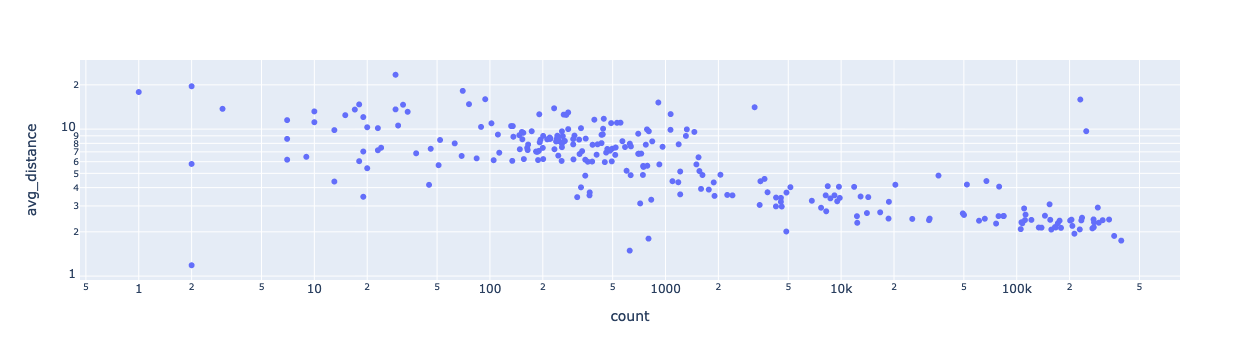

In [60]:
%%local

import plotly.express as px

px.scatter(top_10, x="count", y="avg_distance", log_x=True, log_y=True)

Let's also see how plotly can be used to visualize the locations on a map. 

In [61]:
# make sure locations are loaded - see Exercise 3
nyc_locations = spark.read.csv("s3://brainstation-dsft/sparklab/taxi_lat_lon.csv", header=True)
nyc_locations.createOrReplaceTempView("nyc_locations")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [62]:
%%sql -o nyc_locations

SELECT * FROM nyc_locations

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()

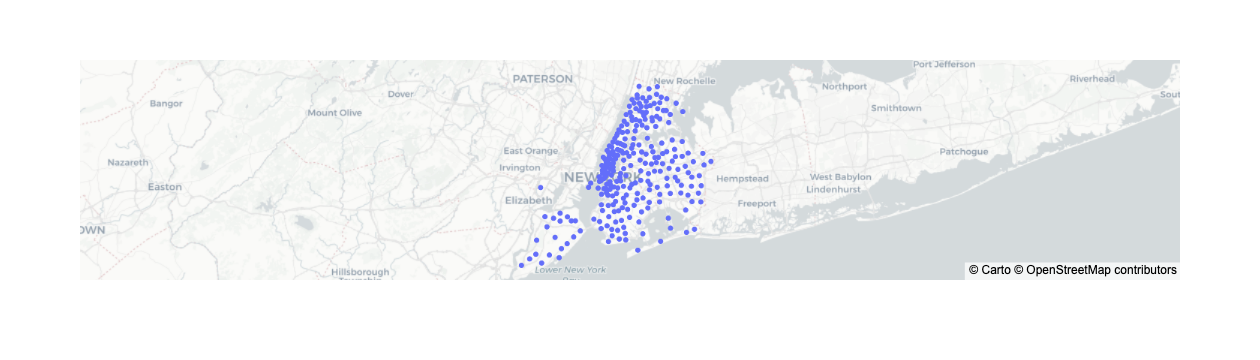

In [63]:
%%local

fig = px.scatter_mapbox(
    nyc_locations, lat="lat", lon="lon", hover_name="Zone", zoom=8
)
fig.update_layout(mapbox_style="carto-positron")
fig.show()

You can look at more built-in plotly.js options for the map style in the [documentation](https://plotly.com/python/reference/layout/mapbox/#layout-mapbox-style).

<div id="container" style="position:relative;">
<div style="position:relative; float:right">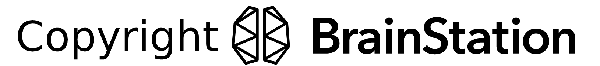
</div>
</div>